## CSCE 633
## Homework 1: Linear models

#### Due: 11:59pm on September 21, 2023

## Part A- Linear Regression

### Reading Data

In [618]:
# Question A
import pandas as pd
import matplotlib.pyplot as plot_graph
from numpy import *
import itertools

file_path = 'hw1_q1_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

stamina = []
attack_value = []
defense_value = []
capture_rate = []
flee_rate = []
spawn_chance = []
combat_point = []

# this is the map where key is the column name and value is the list of values in that column
fields_dictionary = {}
no_of_records = len(df)

# populating the list of each of the column values in respective lists
for i in range(no_of_records):
    stamina.append(df.values[i][1])
    attack_value.append(df.values[i][2])
    defense_value.append(df.values[i][3])
    capture_rate.append(df.values[i][4])
    flee_rate.append(df.values[i][5])
    spawn_chance.append(df.values[i][6])
    combat_point.append(df.values[i][7])

# mapping field names with the list of respective values
fields_dictionary["stamina"] = stamina
fields_dictionary["attack_value"] = attack_value
fields_dictionary["defense_value"] = defense_value
fields_dictionary["capture_rate"] = capture_rate
fields_dictionary["flee_rate"] = flee_rate
fields_dictionary["spawn_chance"] = spawn_chance
fields_dictionary["combat_point"] = combat_point


In [619]:
#df.head()
display(df)

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.00,1079
1,Ivysaur,120,156,158,0.08,0.07,4.20,1643
2,Venusaur,160,198,200,0.04,0.05,1.70,2598
3,Charmander,78,128,108,0.16,0.10,25.30,962
4,Charmeleon,116,160,140,0.08,0.07,1.20,1568
5,Charizard,156,212,182,0.04,0.05,0.31,2620
6,Squirtle,88,112,142,0.16,0.10,58.00,1015
7,Wartortle,118,144,176,0.08,0.07,3.40,1594
8,Blastoise,158,186,222,0.04,0.05,0.67,2560
9,Caterpie,90,62,66,0.40,0.20,303.20,446


### (A-i) (5 points) Data exploration:

In [620]:
# Import required packages here
import pandas as pd
import matplotlib.pyplot as plot_graph
from math import pow
import itertools

In [621]:
def get_pearson_coeff(feature1, feature2):
  '''
    given 2 feature names return the Pearson’s correlation coefficient between them
  '''
  #calculate the sum of values corresponding to feature1 and feature2
  feature1_value_summation_average = float(sum(fields_dictionary[feature1])/no_of_records)
  feature2_value_summation_average = float(sum(fields_dictionary[feature2])/no_of_records)
    
  feature1_feature2_product_summation = 0.0
  feature1_value_square_summation = 0.0
  feature2_value_square_summation = 0.0
    
  for i in range(0, no_of_records):
    feature1_feature2_product_summation += fields_dictionary[feature1][i] * fields_dictionary[feature2][i]
    feature1_value_square_summation += fields_dictionary[feature1][i] * fields_dictionary[feature1][i]
    feature2_value_square_summation += fields_dictionary[feature2][i] * fields_dictionary[feature2][i]

  pearson_correlation_coefficient_numerator = float(feature1_feature2_product_summation - (no_of_records * feature1_value_summation_average * feature2_value_summation_average))
  pearson_correlation_coefficient_denominator = float(pow(feature1_value_square_summation - no_of_records * pow(feature1_value_summation_average, 2), 0.5))
  pearson_correlation_coefficient_denominator *= float(pow(feature2_value_square_summation - no_of_records * pow(feature2_value_summation_average, 2), 0.5))
  
  pearson_correlation_coefficient = float(pearson_correlation_coefficient_numerator/pearson_correlation_coefficient_denominator)

  return pearson_correlation_coefficient


def plot_scatter(feature1, feature2):
  '''
    Plot a 2D Scatter Plot between the 2 features, make sure to label the plots properly
  '''
  # plotting graph for feature 2 and feature1, feature 2 on Y axis and feature 1 on X axis
  plot_graph.plot(fields_dictionary[feature1], fields_dictionary[feature2])
  plot_graph.xlabel(feature1)
  plot_graph.ylabel(feature2)
  plot_graph.title("{0} vs {1}".format(feature2, feature1))
  plot_graph.show()


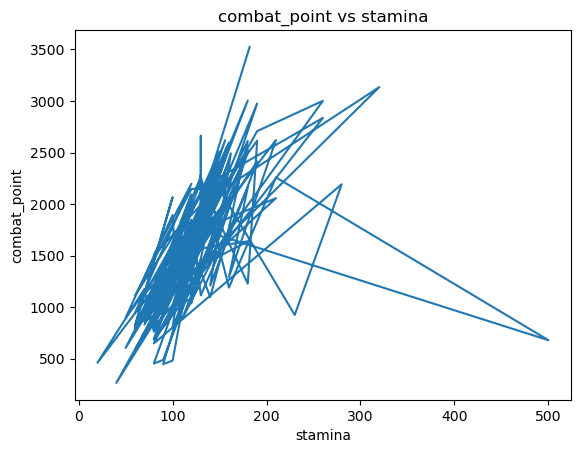

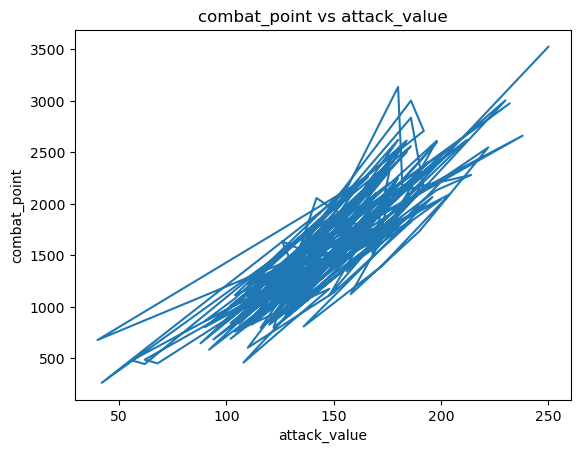

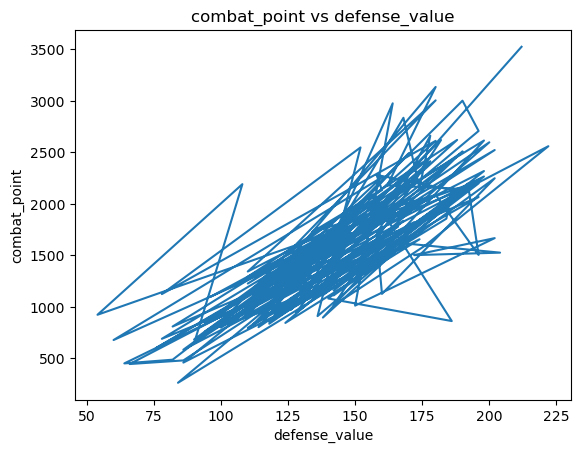

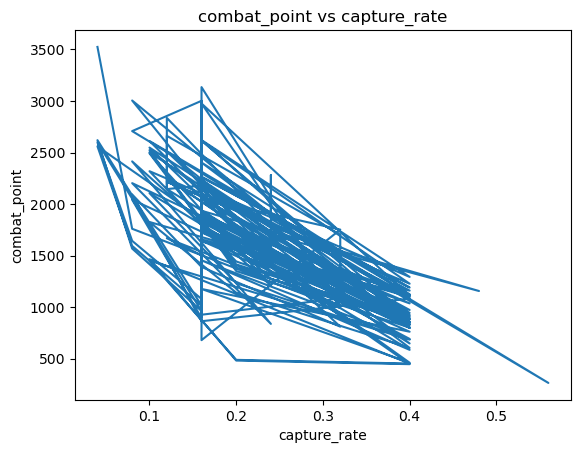

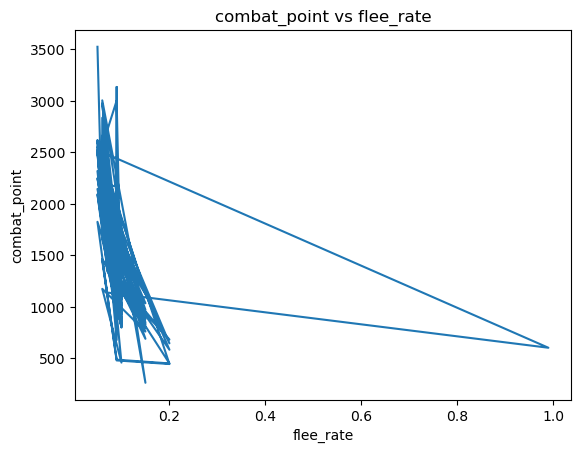

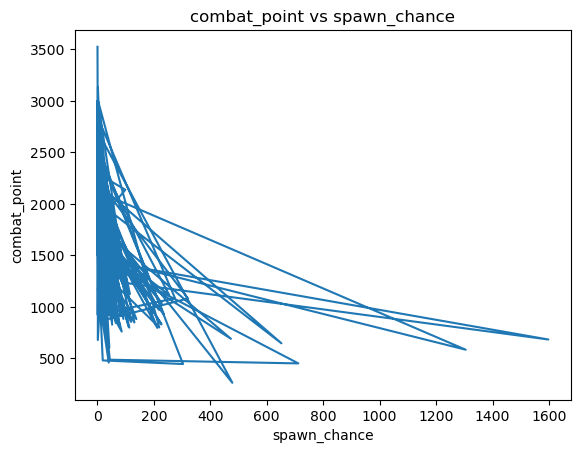

         feature      corr
0        stamina  0.582832
1   attack_value  0.907532
2  defense_value  0.826229
3   capture_rate -0.743008
4      flee_rate -0.407034
5   spawn_chance -0.421327

Feature with most predictive of the number of combat points = attack_value


In [622]:
features_list = ["stamina", "attack_value", "defense_value", "capture_rate", "flee_rate", "spawn_chance"]
coeff_list =  []
max_coeff_value = -5.0
feature_with_max_coeff_value = ""

for i in range(len(features_list)):
    # plotting graph for each feature vs combat_point
    plot_scatter(features_list[i], "combat_point")
    # calculate the pearson correlation coefficient between each feature and combat_point (output)
    coeff_value = get_pearson_coeff(features_list[i], "combat_point")
    coeff_list.append(coeff_value)
    
    # finding the feature with max pearson correlation coefficient value
    if coeff_value > max_coeff_value:
        max_coeff_value = coeff_value
        feature_with_max_coeff_value = features_list[i]

data_exploration1_result = pd.DataFrame()
data_exploration1_result['feature'] = features_list
data_exploration1_result['corr'] = coeff_list
print(data_exploration1_result)
#data_exploration1_result
print()
print("Feature with most predictive of the number of combat points = {0}".format(feature_with_max_coeff_value))


### (A-ii) (5 points) Data exploration:

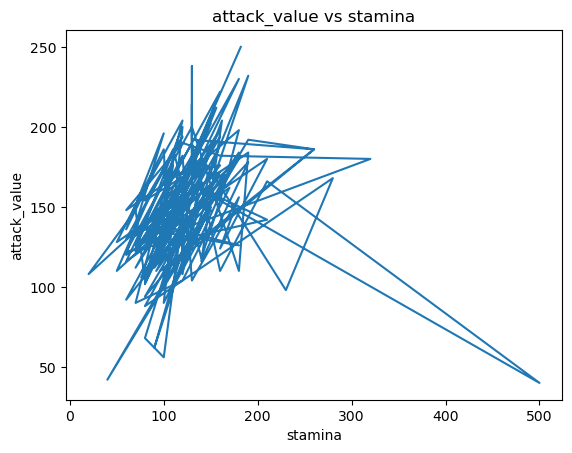

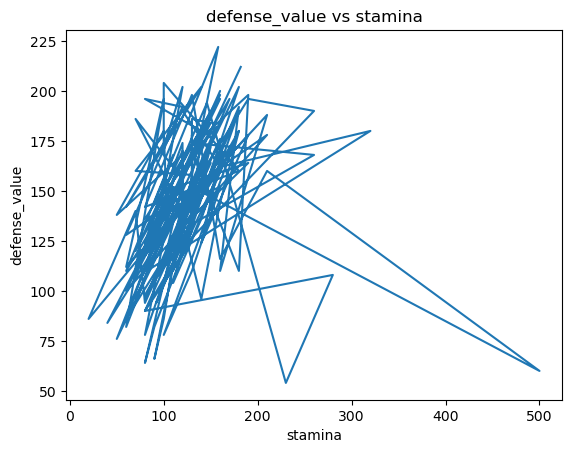

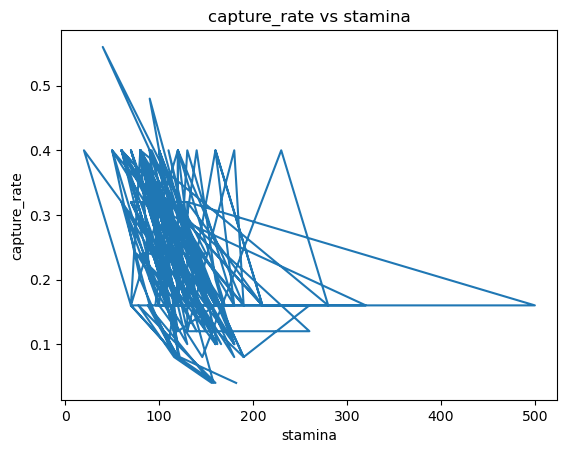

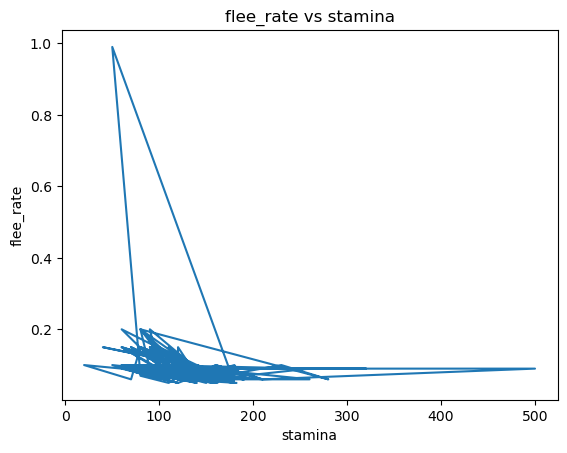

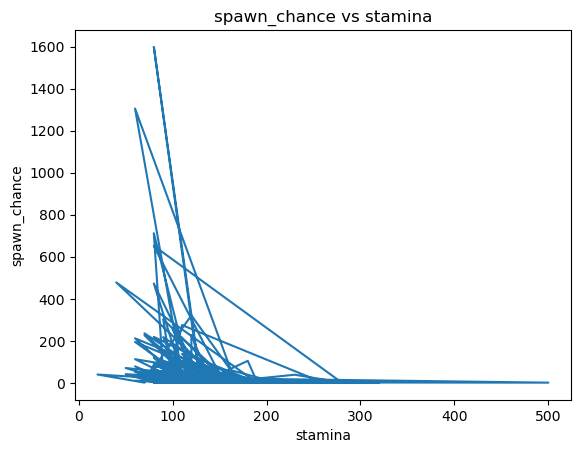

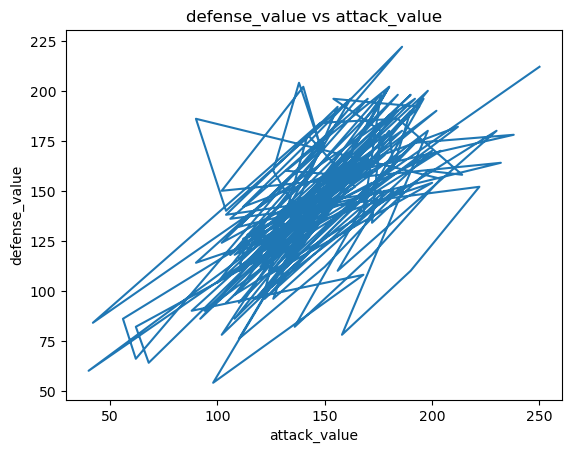

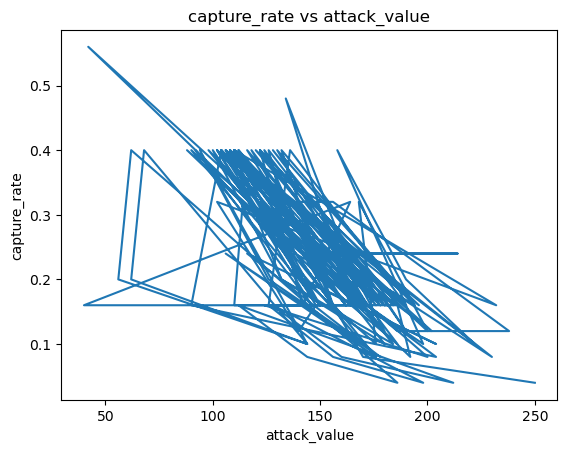

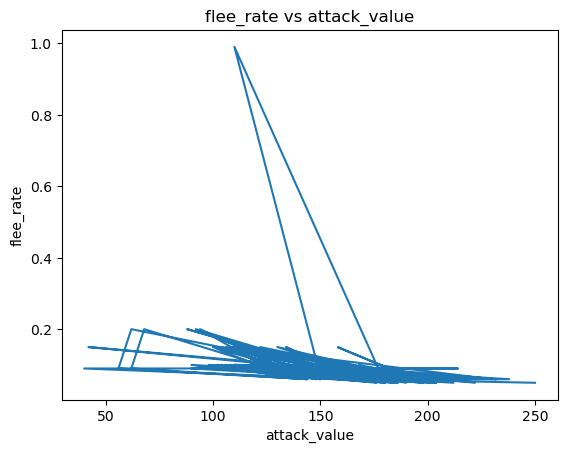

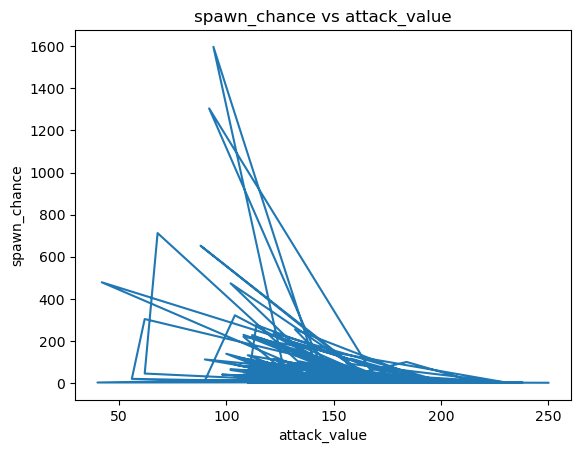

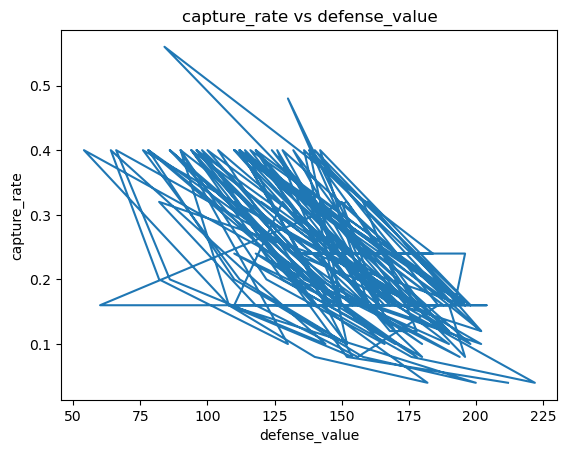

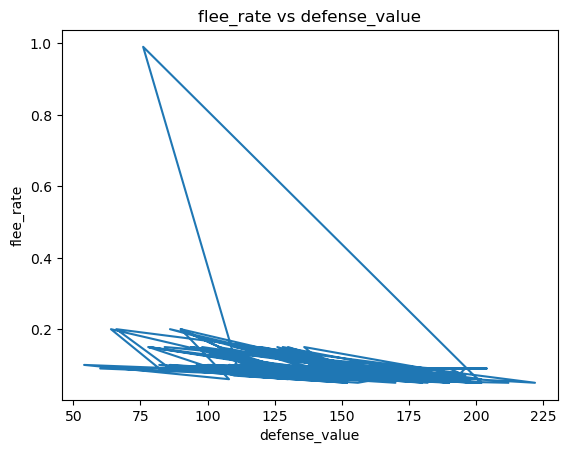

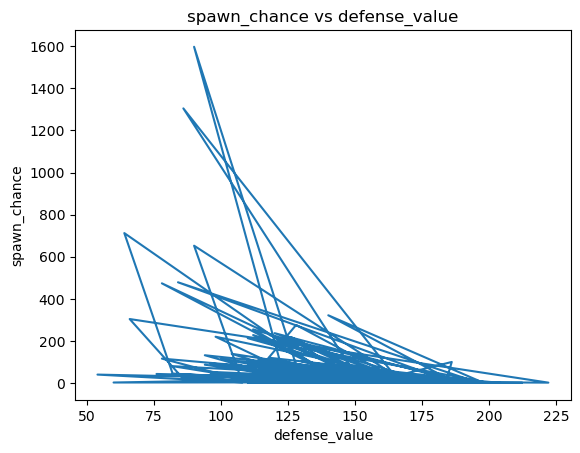

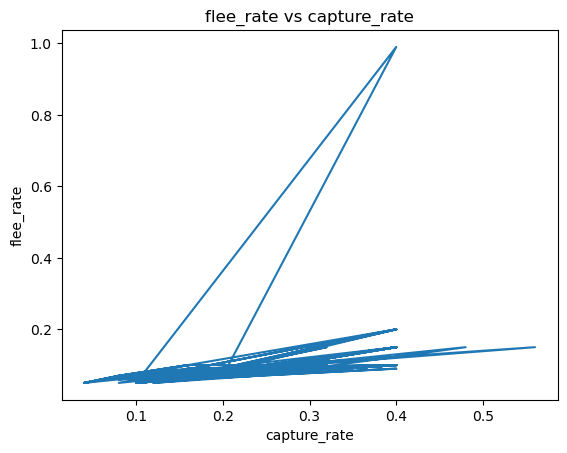

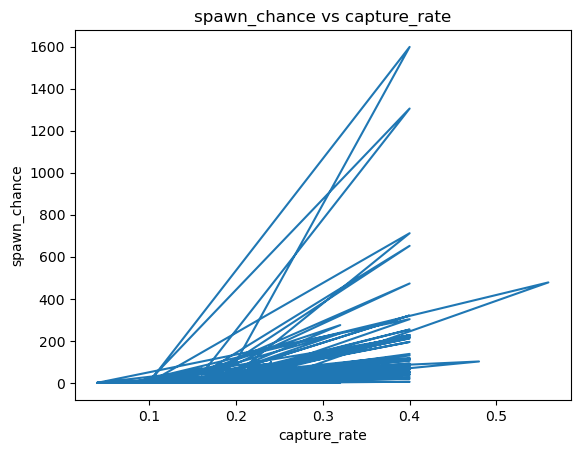

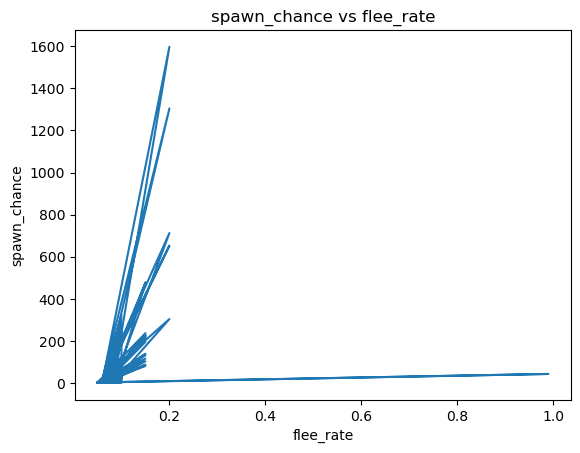

         Feature1       Feature2  corr_coeff
0         stamina   attack_value    0.302995
1         stamina  defense_value    0.302663
2         stamina   capture_rate   -0.446850
3         stamina      flee_rate   -0.271048
4         stamina   spawn_chance   -0.276420
5    attack_value  defense_value    0.736777
6    attack_value   capture_rate   -0.690573
7    attack_value      flee_rate   -0.369064
8    attack_value   spawn_chance   -0.432648
9   defense_value   capture_rate   -0.697266
10  defense_value      flee_rate   -0.423860
11  defense_value   spawn_chance   -0.432499
12   capture_rate      flee_rate    0.440512
13   capture_rate   spawn_chance    0.472793
14      flee_rate   spawn_chance    0.293222

Features with highest correlation are attack_value and defense_value


In [623]:
n = len(features_list)
feature1_list = []
feature2_list = []
coeff_list = [] # This list stores the Pearson correlation values
max_coeff_value = -5.0
feature_pair_with_max_coeff = ["", ""]

for i in range(0,n):
  for j in range(i + 1, n):

    feature1_list.append(features_list[i])
    feature2_list.append(features_list[j])
    
    ''' populate coeff_list here '''
    # plotting graph between feature(i) and feature(j), where feature(j) is in y-axis, and feature(i) in x-axis
    plot_scatter(features_list[i], features_list[j])
    # calculate the pearson correlation coefficient between the two features
    coeff_value = get_pearson_coeff(features_list[i], features_list[j])
    coeff_list.append(coeff_value)
    
    # finding the feature with max pearson correlation coefficient value
    if coeff_value > max_coeff_value:
        max_coeff_value = coeff_value
        feature_pair_with_max_coeff[0] = features_list[i]
        feature_pair_with_max_coeff[1] = features_list[j]
    

data_exploration2_result = pd.DataFrame()
data_exploration2_result['Feature1'] = feature1_list
data_exploration2_result['Feature2'] = feature2_list
data_exploration2_result['corr_coeff'] = coeff_list
print(data_exploration2_result)
print()
print("Features with highest correlation are {0} and {1}".format(feature_pair_with_max_coeff[0], feature_pair_with_max_coeff[1]))

### (A-iii) (15 points) Predicting combat points:

In [624]:
# Import required packages here
import numpy as np
import itertools

In [625]:

# function to generate the transpose of a matrix
def transpose(matrix):
    row_length = len(matrix)
    column_length = len(matrix[0])
    result = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
    return result


def get_predictions(X_train, y_train, X_test):
  '''
    This function is called in the cell below
    Given the train data, write code for training a linear regression model and
    return the predictions on given test data
  '''
  X_train_transpose = transpose(X_train)
  
  inverse_of_X_train_and_transpose_product = np.linalg.inv(np.dot(X_train_transpose, X_train))
  product_of_inverse_of_X_train_and_transpose_and_transpose = np.dot(inverse_of_X_train_and_transpose_product, X_train_transpose)
  coefficient_matrix = np.dot(product_of_inverse_of_X_train_and_transpose_and_transpose, y_train)
  coefficient_list = []
  y_predicted = []
  no_of_features = len(X_train[0])
  test_sample_size = len(X_test)
  
  for i in range(0, no_of_features):
        coefficient_list.append(coefficient_matrix[i])
  
  for i in range(0, test_sample_size):
        predicted_value = 0.0
        for j in range(0, no_of_features):
            predicted_value = predicted_value + float(X_test[i][j] * coefficient_list[j])
        y_predicted.append(predicted_value)

  return y_predicted

In [626]:
### YOUR CODE HERE
def fetch_training_and_testing_data(x, y, iteration, batch_size):
    
    x_training = []
    y_training = []
    x_testing = []
    y_testing = []
    no_of_records = len(x)
    
    for i in range(0, no_of_records):
        
        if i >= iteration * batch_size and i < (iteration * batch_size) + batch_size:
            x_testing.append([1] + x[i])
            y_testing.append(y[i])
        else:
            x_training.append([1] + x[i])
            y_training.append(y[i])
    
    return x_training, y_training, x_testing, y_testing


def get_root_mean_square_error(y_testing, y_predicted):
    
    sample_size = len(y_testing)
    sum_of_squares_of_error = 0.0
    
    for i in range(0, sample_size):
        sum_of_squares_of_error += pow(y_testing[i] - y_predicted[i], 2)
    
    #mean_of_squares_of_error = float(sum_of_squares_of_error/5)
    root_mean_square_error = float(pow(sum_of_squares_of_error, 0.5))
    
    return root_mean_square_error


def fetch_data_for_feature_combination(feature_list, no_of_records):
    x_set = []
    y_set = []
    for i in range(0, no_of_records):
        input_record = []
        for feature in feature_list:
            input_record.append(fields_dictionary[feature][i])
        x_set.append(input_record)
        y_set.append(combat_point[i])
        
    return x_set, y_set


def fetch_rss_scores(x_train, y_train, batch_size):
    
    rss_scores = []
    for i in range(0, 5):
        x_training, y_training, x_testing, y_testing = fetch_training_and_testing_data(x_train, y_train, i, batch_size)
        y_predicted = get_predictions(x_training, y_training, x_testing)
        rss_score = get_root_mean_square_error(y_testing, y_predicted)
        rss_scores.append(rss_score)
    
    return rss_scores


x_train = []
y_train = []

feature_combination = features_list
x_train, y_train = fetch_data_for_feature_combination(feature_combination, no_of_records)

rss_scores = []  # This list stores root mean squared errors for each fold
batch_size = int(no_of_records/5)

'''
Loop through the indices split and calculate the root mean squared error
for each fold and append it to rss_scores list
'''

rss_scores = fetch_rss_scores(x_train, y_train, batch_size)
print(rss_scores)
average_rss = float(sum(rss_scores)/len(rss_scores))
print(average_rss)


[1157.2437772708208, 320.5276776534452, 1055.8298325397998, 1539.1423047091628, 831.8560325216661]
980.9199249389789


###(A-iv) (15 points)

In [627]:
'''
  Experiment with different feature combinations and print the best avergae_rss
  Please provide the rationale behind selecting or dropping some features
'''

def find_sublists_of_given_size(original_list, n):
    return [set(i) for i in itertools.combinations(original_list, n)]

### YOUR CODE HERE

target_features = ["stamina", "capture_rate", "defense_value", "attack_value"]

for i in range(1, len(target_features) + 1):
    
    sublists_of_size_i = find_sublists_of_given_size(target_features, i)
    
    for sublist in sublists_of_size_i:
        x_train = []
        y_train = []

        x_train, y_train = fetch_data_for_feature_combination(sublist, no_of_records)

        rss_scores = []  # This list stores root mean squared errors for each fold
        batch_size = int(no_of_records/5)

        '''
        Loop through the indices split and calculate the root mean squared error
        for each fold and append it to rss_scores list
        '''
        print(sublist)
        rss_scores = fetch_rss_scores(x_train, y_train, batch_size)
        #print(rss_scores)
        average_rss = float(sum(rss_scores)/len(rss_scores))
        print(average_rss)
        print()


### YOUR CODE HERE

{'stamina'}
3292.918047903854

{'capture_rate'}
2528.283819868434

{'defense_value'}
2051.695363471067

{'attack_value'}
1534.5792590115989

{'capture_rate', 'stamina'}
2547.7668432555038

{'defense_value', 'stamina'}
1663.0985708903204

{'attack_value', 'stamina'}
1122.9037948129098

{'capture_rate', 'defense_value'}
2013.9800553443736

{'capture_rate', 'attack_value'}
1468.6697211002393

{'attack_value', 'defense_value'}
1275.690084720874

{'defense_value', 'capture_rate', 'stamina'}
1694.6620669987715

{'capture_rate', 'stamina', 'attack_value'}
1107.0895340524116

{'defense_value', 'attack_value', 'stamina'}
830.0450427053638

{'capture_rate', 'defense_value', 'attack_value'}
1265.7847805888662

{'defense_value', 'capture_rate', 'stamina', 'attack_value'}
865.5047600539825



Question: Please provide the rationale behind selecting or dropping some features
Note: Limit your answer to this cell

stamina (0.58), attack_value (0.907), defense_value (0.826), capture_rate (-0.743) are the features with the highest correlation with combat_point. So, I am planning to generate different combinations from these four features to fetch the combination with lowest RSS value.

At the same time, I need to make sure we don't consider the following pairs of features while generating the feature combinations as these pairs have high correlation (absolute value > 0.5) between them.

attack_value, defense_value (0.736777)
attack_value, capture_rate (-0.690573)
defense_value, capture_rate (-0.697266)

So, Lets take different combinations of {stamina, attack_value, defense_value, capture_rate} and check the RSS value (square root of residual sum of squares error). Following are the results:

{'stamina'}
3292.918047903854

{'capture_rate'}
2528.283819868434

{'defense_value'}
2051.695363471067

{'attack_value'}
1534.5792590115989

{'capture_rate', 'stamina'}
2547.7668432555038

{'defense_value', 'stamina'}
1663.0985708903204

{'attack_value', 'stamina'}
1122.9037948129098

{'capture_rate', 'defense_value'}
2013.9800553443736

{'capture_rate', 'attack_value'}
1468.6697211002393

{'attack_value', 'defense_value'}
1275.690084720874

{'defense_value', 'capture_rate', 'stamina'}
1694.6620669987715

{'capture_rate', 'stamina', 'attack_value'}
1107.0895340524116

{'defense_value', 'attack_value', 'stamina'}
830.0450427053638

{'capture_rate', 'defense_value', 'attack_value'}
1265.7847805888662

{'defense_value', 'capture_rate', 'stamina', 'attack_value'}
865.5047600539825



{'defense_value', 'attack_value', 'stamina'} (830.0450427053638) has the lowest RSS (830.0450427053638), and  {'defense_value', 'capture_rate', 'stamina', 'attack_value'} (865.5047600539825) is coming next but these two combinations have {'defense_value', 'attack_value'} which are highly correlated with each other.

So, the next best bet is {'attack_value', 'stamina'} (1122.9037948129098) where the features are not highly correlated with each other.


### (A-v) (10 points)

Question: Explain the mathematical derivation for training the
linear regression model with ordinary least squares (OLS) solution.

---

(You should use LaTeX commands in a markdown cell to write the math)


The linear regression model is as follows:
<br>
$y = f(x) = w^{T}X + w_{0} + e$
<br>
$W^{T}X + W$ is the linear term and e is the error term.
<br>
X belongs to $R^{n x D}$ and X is the data matrix whose rows correspond to the training samples x1, x2, x3, xn where xi belongs to $R^{n x D}$
<br>
W is the weight matrix corresponding to the features, and W belongs to $R^D$
<br>
In this case, we are considering the residual sum of squares of the error (RSS) as the error function.
<br>
<br>
RSS = summation(i = 1 to N)($y_{i}$ - sigma(j = 1 to D)($x_{ij} w_{j})^{2}$
<br>
$w_{min}$ is the W matrix for which the sum of errors (e) is minimum, which implies:
<br>
$w_{min}$ = arg min(w) (summation(i = 1 to n))($y_{i}$ - sigma(j = 1 to D)($x_{ij} w_{j})^{2}$
<br>
In matrix notation, we can translate this linear regression model to as follows:
<br>
$w_{min}$ = arg min(w) $||$ y - X w $||^{2}$   (equation 1)
<br>
We have used the notation that square l2 form of a vector $X = (a1, a2, ......, aD)^{T}$ which belongs to $R^{D}$ is given by $|| X ||^{2}$ = $X^{T}X$ = summation(i = 1 to D) $( x_{i}^2)$
<br>
<br>
Equation 1 can be translated to the following:
<br>
$|| y - X w ||^{2}$  = $(y - Xw)^{T}(y - Xw)$
<br>
= ($(y^{T} - (Xw)^{T} $)$(y - Xw)$
<br>
= ($(y^{T} - w^{T}X^{T} $)$(y - Xw)$
<br>
= $y^{T}y - w^{T}X^{T}y - y^{T}Xw + w^{T}X^{T}Xw$ 
<br>
$w^{T}X^{T}y$ and $y^{T}Xw$ are scalars (which can be proved by the dimension of the resultant matrix which is 1 x 1). And one is the transpose of the other.
<br>
Hence, $w^{T}X^{T}y$ = $y^{T}Xw$
<br>
That implies, 
<br>
S(w) = $||$ y - X w $||^{2}$  =  $y^{T}y - 2w^{T}X^{T}y + w^{T}X^{T}Xw$ 
<br>
Given that we need to find w for which S(w) is minimum, we do partial differentiation of S(w) with respect to w.
<br>
dS / dw = 0
<br>
This implies the following:
<br>
d/dw ($y^{T}y - 2w^{T}X^{T}y + w^{T}X^{T}Xw$) = 0
<br>
This implies,
<br>
-2$X^{T}y$ + 2$X^{T}Xw$ = 0   (equation 2)
<br>
where $y^{T}y$ is constant
<br>
and d/dw ($w^TX^{T}y$) = $X^{T}y$
<br>
and d/dw ($w^{T}X^{T}Xw$) = $2X^{T}yw$
<br>
<br>
When simplify equation 2,
<br>
$(X^{T}X)w$ = $X^{T}y$
<br>
Multiplying ($(X^{T}X)^{-1}$) on both sides,
<br>
$(X^{T}X)^{-1}(X^{T}X)w$ = $(X^{T}X)^{-1}X^{T}y$
<br>
w = $(X^{T}X)^{-1}X^{T}y$
<br>
<br>
Hence proved.



#Part B - Logistic Regression

## (B-i) (20 points) Data Preprocessing

### 1. Download and read the data.
##### For Python, you may use pandas library and use read csv function

In [628]:
import pandas as pd

hitters_file_path = 'hw1_q2_data.csv'
### YOUR Input HERE
# This dataset has 322 records and 21 columns (including the Player field)
# There are 19 features and one target attribute (which is NewLeague)

df = pd.read_csv(hitters_file_path)

### 2. Print the data. How does the data look like? Add a short description about the data in the cell below.
#####  (You may use head() function in pandas library)

In [629]:
### YOUR CODE HERE
display(df)
#df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


Question: How does the data look like? Add a short description about the data.
Note: Limit your answer to this cell

This is a structured data about the players and their associated attributes and statistical numbers, using which the new league of the players are being predicted.
There are 19 features in total, which are associated to the player. And the target variable is NewLeague (which takes either A or N as its value).
There are 322 player records in total.
There are 17 numerical features and the remaining 2 are non-numeric (League and Division).
Some of the records have empty values with respect to "Salary" column (indicated as NaN).

### 3. Print the shape of the data.
##### Shape means the dimensions of the data.


In [630]:
### YOUR CODE HERE

no_of_records = len(df)
input_records = []
target = []

# populating the feature attributes as a list to maintain input and output records
for i in range(no_of_records):
    input_record = []
    for j in range(1, 20):
        input_record.append(df.values[i][j])
    target.append(df.values[i][20])
    input_records.append(input_record)
        
print("Shape of data:")
print("no of rows = {0}".format(str(len(input_records))))
print("no of columns = {0}".format(str(len(input_records[0]) + 2))) # one for Player field and other for NewLeague

### YOUR CODE HERE

Shape of data:
no of rows = 322
no of columns = 21


### 4. Does the data have any missing values? How many are missing? Print the number of missing values.
##### In pandas, check out isnul() and isnul().sum()


In [631]:
### YOUR CODE HERE
no_of_missing_values = 0
no_of_records_with_missing_values = 0

for i in range(0, no_of_records):
    is_record_flagged_already = False
    for j in range(0, 19):
        if pd.isnull(input_records[i][j]):
            no_of_missing_values = no_of_missing_values + 1
            if is_record_flagged_already == False:
                no_of_records_with_missing_values = no_of_records_with_missing_values + 1
                is_record_flagged_already = True

no_of_missing_values_as_string = str(no_of_missing_values)
no_of_records_with_missing_values_as_string = str(no_of_records_with_missing_values)

print("No of empty cells (with missing values) : {0}".format(no_of_missing_values))
print("No of input records with empty cell (with missing values) : {0}".format(no_of_records_with_missing_values))

No of empty cells (with missing values) : 59
No of input records with empty cell (with missing values) : 59


### 5. Drop all the rows with any missing data and print the shape of the data frame.
##### In pandas, check out dropna(). dropna() accepts an argument inplace, check out what it does and when it comes in handy.



In [632]:
### YOUR CODE HERE

input_records_with_complete_data = []
target_for_complete_inputs = []

# drop all the rows with one or more empty cells
df.dropna(how='any', axis=0, inplace=True)

for i in range(0, no_of_records):
    is_record_valid = True
    for j in range(0, 19):
        if pd.isnull(input_records[i][j]):
            is_record_valid = False
            break
    
    if is_record_valid == True:
        input_records_with_complete_data.append(input_records[i])
        target_for_complete_inputs.append(target[i])

print("Shape of data:")
print("no of rows = {0}".format(str(len(input_records_with_complete_data))))
print("no of columns = {0}".format(str(len(input_records_with_complete_data[0]) + 2))) # one for Player field and other for NewLeague

print()

display(df)
### YOUR CODE HERE

Shape of data:
no of rows = 263
no of columns = 21



,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


### 6. Extract the features and the label from the data.
##### Our label is NewLeague and all the others are considered features.


In [633]:
features = []
labels = []
label_list = []

columns_list = df.columns.values
label_list = [columns_list[-1]]

# removing first and last column to extract the feature set
columns_list = np.delete(columns_list, 0)
columns_list = np.delete(columns_list, -1)
feature_list = columns_list

print("Feature list :")
print(feature_list)
print("Label list :")
print(label_list)
print()
labels = df[["NewLeague"]]
features = df.drop(["Player", "NewLeague"], axis=1)
print()
print("Features :")
print(features)
print()
print("Labels :")
print(labels)
print()
print("Dataframe :")
display(df)

Feature list :
['AtBat' 'Hits' 'HmRun' 'Runs' 'RBI' 'Walks' 'Years' 'CAtBat' 'CHits'
 'CHmRun' 'CRuns' 'CRBI' 'CWalks' 'League' 'Division' 'PutOuts' 'Assists'
 'Errors' 'Salary']
Label list :
['NewLeague']


Features :
     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
5      594   169      4    74   51     35     11    4408   1133      19   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85  

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


### 7. Data preprocessing. We want to do one-hot encoding for categorical features.
##### First separate numerical columns from nonnumerical columns.
##### Afterwards, use get dummies for transforming to categorical. Then concat both parts (pd.concat()).


In [634]:
### YOUR CODE HERE
def is_floating_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

numerical_columns = []
non_numerical_columns = []
non_numerical_columns_values = []

# removing the target column NewLeague
df.drop(["NewLeague"], axis=1, inplace=True)

for i in range(0, 19):
    column_value = str(input_records_with_complete_data[0][i])
    if column_value.isnumeric() == True or is_floating_number(column_value):
        numerical_columns.append(columns_list[i])
    else:
        non_numerical_columns.append(columns_list[i])

print("Numeric columns :")
print(numerical_columns)       
print()      
print("Non-numeric columns :")
print(non_numerical_columns)

for non_numerical_column in non_numerical_columns:
    column_values = df[non_numerical_column].values.tolist()
    non_numerical_columns_values.append(column_values)

# removing all non numeric columns
df.drop(non_numerical_columns, axis=1, inplace=True)

# adding all non-numeric columns at the end
for i in range(len(non_numerical_columns)):
    df[non_numerical_columns[i]] = non_numerical_columns_values[i]

# converting the non-numeric columns to categorical
df = pd.get_dummies(df, columns=non_numerical_columns)

display(df)


Numeric columns :
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']

Non-numeric columns :
['League', 'Division']


,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,632,43,10,475.0,0,1,0,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,880,82,14,480.0,1,0,0,1
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,200,11,3,500.0,0,1,1,0
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,805,40,4,91.5,0,1,1,0
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,336,194,282,421,25,750.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,311,138,325,9,3,700.0,0,1,1,0
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,451,875,313,381,20,875.0,1,0,1,0
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,93,146,37,113,7,385.0,1,0,0,1
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,420,332,1314,131,12,960.0,1,0,1,0


### 8. Transform the output into numerical format.
##### If you have selected the label as a pandas series, you can use .replace() function. In the label, transform ’A’ to 0 and ’N’ to 1.


In [635]:
### YOUR CODE HERE

transformed_output = []

for i in range(0, len(input_records_with_complete_data)):
    if target_for_complete_inputs[i] == 'A':
        transformed_output.append(0)
    else:
        transformed_output.append(1)

df[label_list[0]] = transformed_output

# final dataframe looks like this
display(df)

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,375,632,43,10,475.0,0,1,0,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,263,880,82,14,480.0,1,0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,354,200,11,3,500.0,0,1,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,33,805,40,4,91.5,0,1,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,194,282,421,25,750.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,138,325,9,3,700.0,0,1,1,0,1
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,875,313,381,20,875.0,1,0,1,0,0
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,146,37,113,7,385.0,1,0,0,1,0
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,332,1314,131,12,960.0,1,0,1,0,0


## (B-ii) (20 points) Models for Hitters

### 1. Prediction: Using 80% of the data as a training set and 20% as a testing set.
#### You may use sklearn package in this question.


In [636]:
# Import required packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot_graph
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score

In [637]:
### YOUR CODE HERE

y_data = df[label_list[0]]
columns_to_be_dropped = ["Player"]
columns_to_be_dropped.append(label_list[0])

x_data = df.drop(columns_to_be_dropped, axis=1)
features = x_data.columns.values

x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size=0.2)

# creating linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_training, y_training)
linear_regression_coefficients = linear_regression_model.coef_

# creating logistic regression model
logistic_regression_model.fit(x_training, y_training)
logistic_regression_coefficients = logistic_regression_model.coef_


### 2. Print the coefficients for each feature for both models. Are they the same? Are they different? Why? Please describe your observation in the cell below.

In [638]:
linear_coef   = linear_regression_coefficients
logistic_coef = logistic_regression_coefficients
print("Linear regression coefficients :")
print(linear_coef)
print('\n')
print("Logistic regression coefficients :")
print(logistic_coef)

Linear regression coefficients :
[ 1.13147761e-04 -2.82244278e-04 -6.07116524e-04 -8.64570914e-05
 -6.58674084e-04 -2.95243558e-04 -1.08248926e-02 -3.38155142e-05
  4.72398429e-04  9.26435010e-04 -4.06394223e-04 -2.80343830e-04
 -3.52719524e-05  3.35576196e-05  1.07449494e-04 -2.67763715e-03
  2.31221438e-05 -4.36945168e-01  4.36945168e-01  1.11853322e-02
 -1.11853322e-02]


Logistic regression coefficients :
[[ 2.87715243e-03 -5.95876717e-03 -9.62642676e-03 -8.22469103e-03
  -8.75786936e-03 -4.49753009e-03 -1.40514939e-01 -6.83032484e-04
   7.83259479e-03  1.20493101e-02 -6.21880973e-03 -4.74727709e-03
   2.21677800e-04  5.76185376e-04  1.14895065e-03 -2.63024195e-02
   4.39269464e-04 -2.41895264e+00  2.55595929e+00  1.69751622e-01
  -3.27449731e-02]]


Question:  Are the coefficients for each feature for both models the same? Are they different? Why? Please describe

All the coefficients for linear and logistic regression models are different. it's because of the fundamental differences and basis between these two models:

Loss function of linear regression is the sum of squares of the differences between the original predicted value. We do partial differentiation on the loss function wrt the weights (coefficients) of the features. Whereas in logistic regression, loss function is the logarithmic loss function which indicates the closenss between the actual binary class and prediction probability of that binary class. So, the nature of the parital derivatives of the loss function of linear regression and logistic regression with respect to the weights of the features are different, implying the difference in the coefficients of these features.

Linear regression's goal to predict a numeric output whereas logistic regression is primarily used to predict a binary output (binary classifier). In Linear regression, the output is linearly dependent on the features, and the model predicts the output value with respect to the values of the feature attributes. Whereas, Logistic regression calculates the probability of the both of the binary outputs, and this probability of the binary output is linearly dependent on the feature attributes.

### 3. Plot the ROC curve for both models. Print the area under the curve measurements.


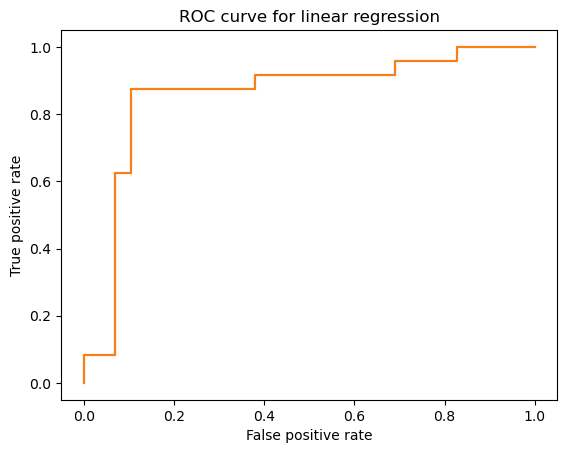

Area of ROC curve for linear regression :
0.8577586206896551


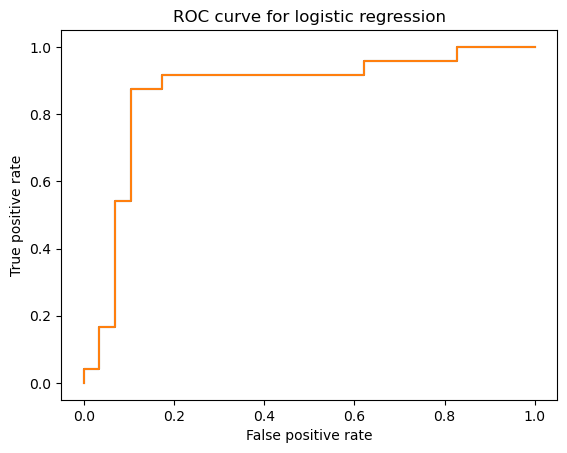

Area of ROC curve for logistic regression :
0.867816091954023


In [639]:
### YOUR CODE HERE

#Linear regression
y_predicted_linear = linear_regression_model.predict(x_testing)
fpr_linear, tpr_linear, threshold_linear = metrics.roc_curve(y_testing, y_predicted_linear)

plot_graph.plot(fpr_linear, tpr_linear)
plot_graph.plot(fpr_linear, tpr_linear)
plot_graph.xlabel("False positive rate")
plot_graph.ylabel("True positive rate")
plot_graph.title("ROC curve for linear regression")
plot_graph.show()

area_under_curve_linear_regression = metrics.roc_auc_score(y_testing, y_predicted_linear)
print("Area of ROC curve for linear regression :")
print(area_under_curve_linear_regression)

#Logistic regression
y_predicted_logistic = logistic_regression_model.predict_proba(x_testing)
fpr_logistic, tpr_logistic, threshold_logistic = metrics.roc_curve(y_testing, y_predicted_logistic[:, 1])

plot_graph.plot(fpr_logistic, tpr_logistic)
plot_graph.plot(fpr_logistic, tpr_logistic)
plot_graph.xlabel("False positive rate")
plot_graph.ylabel("True positive rate")
plot_graph.title("ROC curve for logistic regression")
plot_graph.show()

area_under_curve_logistic_regression = metrics.roc_auc_score(y_testing, y_predicted_logistic[:, 1])
print("Area of ROC curve for logistic regression :")
print(area_under_curve_logistic_regression)


### 4. What is the optimal decision threshold to maximize the f1 score? Print the optimal threshold.
### How did you calculate the optimal threshold? Explain in the cell below.


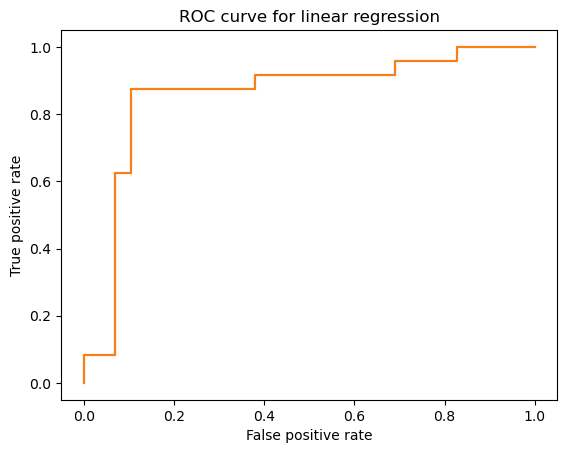

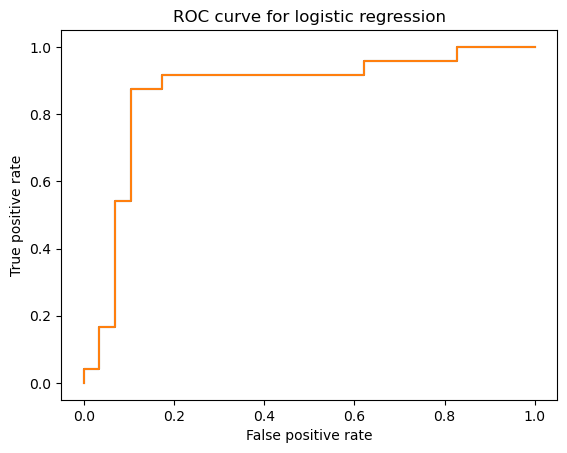

area under the curve for Linear Reg Model=  0.8577586206896551
area under the curve for Logistic Reg Model=  0.867816091954023
Optimal Threshold for Linear Model=  0.870767374462349
Optimal Threshold for Logistic Model=  0.16343845142454638


In [640]:
# Import required packages here
import numpy as np
from typing import Tuple, List
from sklearn import preprocessing, metrics
from sklearn.metrics import roc_auc_score, f1_score

def linear_pred_and_area_under_curve(linear_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of Linear Regression
        Model in the following order
        [linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    ### YOUR CODE HERE
    y_predicted_linear = linear_model.predict(x_test)
    fpr_linear, tpr_linear, threshold_linear = metrics.roc_curve(y_test, y_predicted_linear)

    plot_graph.plot(fpr_linear, tpr_linear)
    plot_graph.plot(fpr_linear, tpr_linear)
    plot_graph.xlabel("False positive rate")
    plot_graph.ylabel("True positive rate")
    plot_graph.title("ROC curve for linear regression")
    plot_graph.show()

    area_under_curve_linear_regression = metrics.roc_auc_score(y_test, y_predicted_linear)
    
    return y_predicted_linear, fpr_linear, tpr_linear, threshold_linear, area_under_curve_linear_regression
    

def logistic_pred_and_area_under_curve(logistic_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of
        Logistic Regression Model in the following order
        [log_reg_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    ### YOUR CODE HERE
    y_predicted_logistic = logistic_model.predict_proba(x_test)
    fpr_logistic, tpr_logistic, threshold_logistic = metrics.roc_curve(y_test, y_predicted_logistic[:, 1])

    plot_graph.plot(fpr_logistic, tpr_logistic)
    plot_graph.plot(fpr_logistic, tpr_logistic)
    plot_graph.xlabel("False positive rate")
    plot_graph.ylabel("True positive rate")
    plot_graph.title("ROC curve for logistic regression")
    plot_graph.show()

    area_under_curve_logistic_regression = metrics.roc_auc_score(y_test, y_predicted_logistic[:, 1])
    
    return y_predicted_logistic[:, 1], fpr_logistic, tpr_logistic, threshold_logistic, area_under_curve_logistic_regression


def fetch_output_with_given_threshold(y, threshold):
    result = []
    for output in y:
        if output > threshold:
            result.append(1)
        else:
            result.append(0)
    return result


X_test = x_testing
y_test = y_testing
linear_model = linear_regression_model
logistic_model = logistic_regression_model

linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve = linear_pred_and_area_under_curve(linear_model, X_test, y_test)

log_y_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve = logistic_pred_and_area_under_curve(logistic_model, X_test, y_test)


print('area under the curve for Linear Reg Model= ', linear_reg_area_under_curve)
print('area under the curve for Logistic Reg Model= ', log_reg_area_under_curve)

linear_optimal_threshold = -1
linear_regression_max_f1 = float('-inf')
log_optimal_threshold = -1
logistic_regression_max_f1 = float('-inf')

'''
  Write code to determite the optimal threshold for linear and logistic regression
  and store them in linear_optimal_threshold and log_optimal_threshold
'''

for threshold in linear_threshold:
    y_predicted_output = fetch_output_with_given_threshold(linear_y_pred, threshold)
    current_f1_score = metrics.f1_score(y_test, y_predicted_output)
    if current_f1_score > linear_regression_max_f1:
        linear_regression_max_f1 = current_f1_score
        linear_optimal_threshold = threshold
        

for threshold in log_threshold:
    y_predicted_output = fetch_output_with_given_threshold(log_y_pred, threshold)
    current_f1_score = metrics.f1_score(y_test, y_predicted_output)
    if current_f1_score > logistic_regression_max_f1:
        logistic_regression_max_f1 = current_f1_score
        log_optimal_threshold = threshold


print('Optimal Threshold for Linear Model= ', linear_optimal_threshold)
print('Optimal Threshold for Logistic Model= ', log_optimal_threshold)

Question: What is the optimal decision threshold to maximize the f1 score? How did you calculate the optimal threshold?

Note: Limit your answer to this cell

For Linear regression model, 
Optimal Threshold =  0.8875282432854488

For Logistic regression model,
Optimal Threshold =  0.7247054445121118

(Note: the above optimal threshold values changes for every run, and I have added the results I got from the latest run)

Once we get the list of thresholds when generating the ROC curves, we calculate the f1 score with respect to the each of the threshold value in the list (if predicted_value > threshold value, consider the output as 1. Else, consider the output as 0). So, we will pick the threshold (tx) for which the f1 score is maximum, and we conclude that this threshold (tx) is the optimal decision threshold.


### 5. Five-fold Cross-validation: Repeat (1) using a stratified, five-fold cross-validation.


ROC curve for iteration 1 :


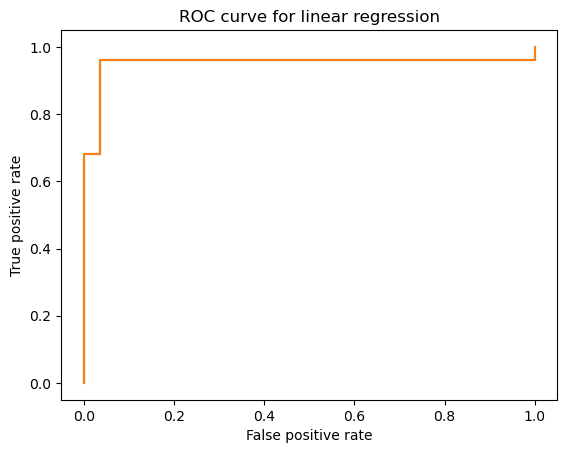

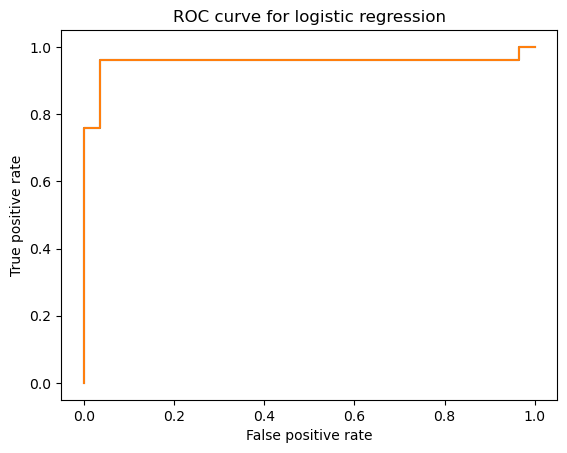

ROC curve for iteration 2 :


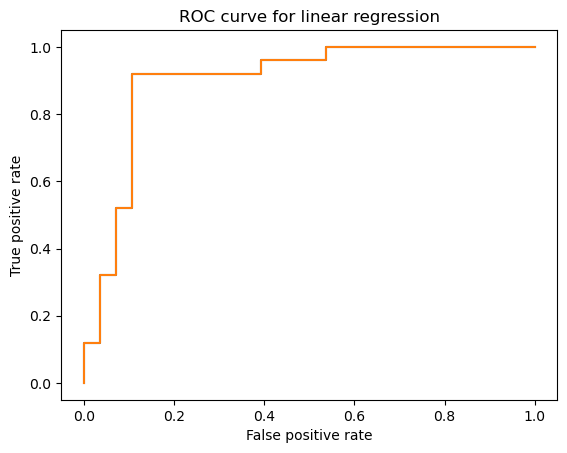

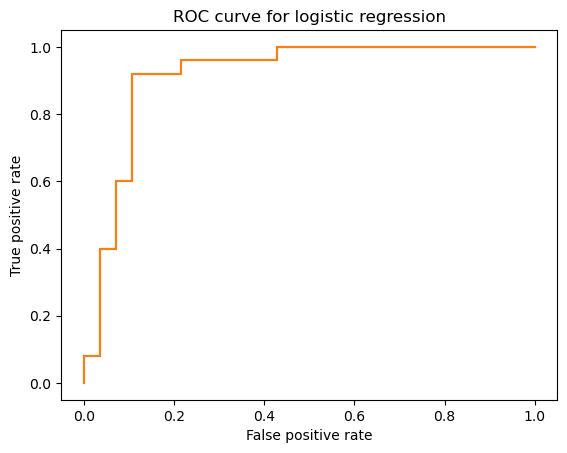

ROC curve for iteration 3 :


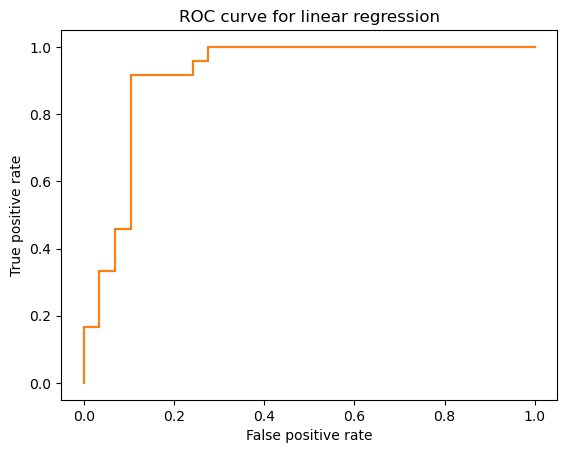

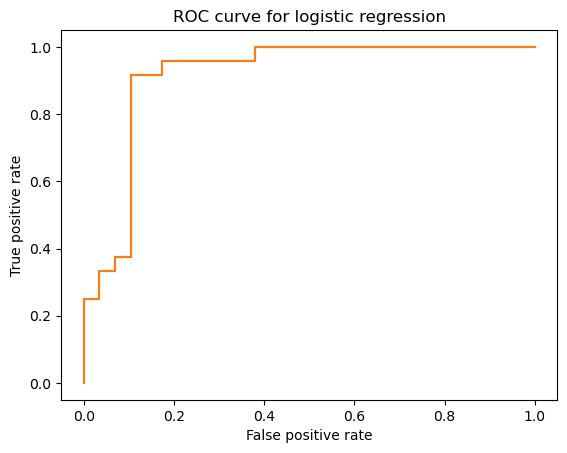

ROC curve for iteration 4 :


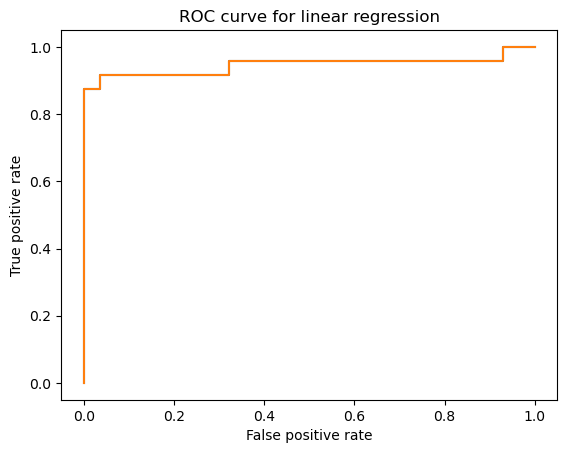

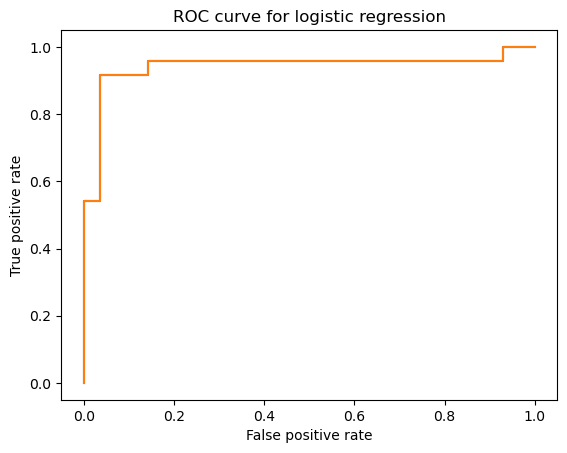

ROC curve for iteration 5 :


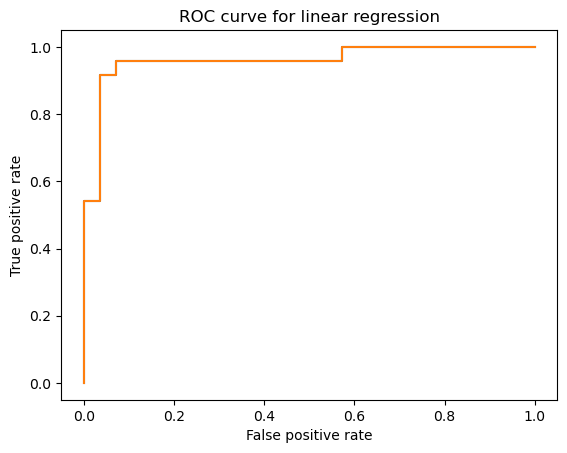

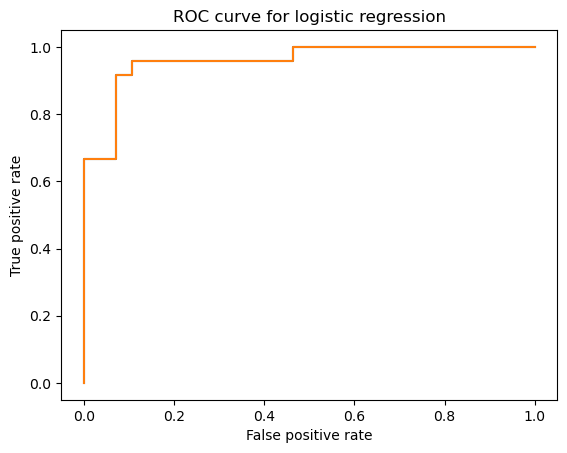

[21, 21, 21, 21, 21] [0.9542857142857143, 0.9142857142857143, 0.9152298850574713, 0.9419642857142858, 0.9583333333333333] [0.95, 0.8985714285714286, 0.9166666666666666, 0.9464285714285714, 0.9598214285714286] [0.96, 0.9019607843137256, 0.8979591836734694, 0.9361702127659574, 0.9199999999999999] [0.96, 0.9019607843137256, 0.8979591836734694, 0.9361702127659574, 0.9387755102040817]


In [641]:
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing


def find_no_of_features_used(feature_coefficient_list):
    feature_count = 0
    for feature_coefficient in feature_coefficient_list[0]:
        if feature_coefficient != 0.0:
            feature_count = feature_count + 1
    return feature_count

def fetch_output_df_with_given_threshold(y, threshold):
    y_resultant = (y >= threshold).astype(int)
    return y_resultant

def train_test_folds(skf, num_of_folds: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
    '''
        train and test in for loop with different training and test sets obatined from skf.
        use a PENALTY of 12 for logitic regression model for training
        find features in each fold and store them in features_count array.
        populate auc_log and auc_linear arrays with roc_auc_score of each set trained on logistic regression and linear regression models respectively.
        populate f1_log and f1_linear arrays with f1_score of each set trained on logistic regression and linear regression models respectively.
        return features_count, auc_log, auc_linear, f1_log and f1_linear
    '''
    num_of_folds = num_of_folds
    max_iter = 100000008

    X = features
    y = labels
    auc_log = []
    auc_linear = []
    features_count = []
    f1_log= []
    f1_linear= []
    
    ### YOUR CODE HERE
    linear_regression_model = LinearRegression()
    logistic_regression_model = LogisticRegression(max_iter=100000008)
    iteration = 1
    for training_index, testing_index in skf.split(x_data, y_data):
        x_training = x_data.iloc[training_index]
        x_testing = x_data.iloc[testing_index]
        y_training = y_data.iloc[training_index]
        y_testing = y_data.iloc[testing_index]
        print("ROC curve for iteration {0} :".format(str(iteration)))
        # training the linear model
        linear_regression_model.fit(x_training, y_training)
        
        # training the logistic model
        logistic_regression_model.fit(x_training, y_training)
        logistic_regression_coefficients = logistic_regression_model.coef_
        
        feature_count_for_current_fold = find_no_of_features_used(logistic_regression_coefficients)
        features_count.append(feature_count_for_current_fold)
        
        linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve = linear_pred_and_area_under_curve(linear_regression_model, x_testing, y_testing)
        log_y_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve = logistic_pred_and_area_under_curve(logistic_regression_model, x_testing, y_testing)

        linear_optimal_threshold = -1
        linear_regression_max_f1 = float('-inf')
        log_optimal_threshold = -1
        logistic_regression_max_f1 = float('-inf')

        for threshold in linear_threshold:
            y_predicted_output = fetch_output_df_with_given_threshold(linear_y_pred, threshold)
            current_f1_score = metrics.f1_score(y_testing, y_predicted_output)
            if current_f1_score > linear_regression_max_f1:
                linear_regression_max_f1 = current_f1_score
                linear_optimal_threshold = threshold

        for threshold in log_threshold:
            y_predicted_output = fetch_output_df_with_given_threshold(log_y_pred, threshold)
            current_f1_score = metrics.f1_score(y_testing, y_predicted_output)
            if current_f1_score > logistic_regression_max_f1:
                logistic_regression_max_f1 = current_f1_score
                log_optimal_threshold = threshold
        
        auc_log.append(log_reg_area_under_curve)
        auc_linear.append(linear_reg_area_under_curve)
        f1_linear.append(linear_regression_max_f1)
        f1_log.append(logistic_regression_max_f1)
        iteration = iteration + 1
    
    return features_count, auc_log, auc_linear, f1_log, f1_linear


num_folds= 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= 42)
features_count, auc_log, auc_linear, f1_log, f1_linear = train_test_folds(skf, num_folds)
print(features_count, auc_log, auc_linear, f1_log, f1_linear)

### 6. Does the feature count change in each fold? Please explain in the cell below.

If we see the above result, the features_count array is as follows:
[21, 21, 21, 21, 21]

We basically calculated this array using the regression model coefficients generated after training the model. We check for the number of non-zero coefficients in the coefficients list (non-zero coefficient implies that the respective feature has a non zero weight, implying that its been used for building that model). Given that the number of non-zero coefficients in the list was 21 in all the five folds, it implies that all the features have been used to build the model effectively.
Thus, it implies that the feature count has been constant in all the folds. 
So, we can conclude that the feature count dint change in each fold.


In [642]:
def is_features_count_changed(features_count: np.array) -> bool:
    '''
       compare number of features in each fold (features_count array's each element)
       return true if features count doesn't change in each fold. else return false
    '''
    ### YOUR CODE HERE
    feature_count = features_count[0]
    for i in range(1, len(features_count)):   
        if features_count[i] != feature_count:
            return True
    return False
    ### YOUR CODE HERE

# call is_features_count_changed function and print true if features count changes in each fold. else print false
print(is_features_count_changed(features_count))

False


Question: Do the features change in each fold?

Note: Limit your answer to this cell

As per the function's return value (False), we can conclude that the features dint change in each fold. All the 21 features have been used in each fold.

If we see the above result, the features_count array is as follows:
[21, 21, 21, 21, 21]

We basically calculated this array using the regression model coefficients generated after training the model. We check for the number of non-zero coefficients in the coefficients list (non-zero coefficient implies that the respective feature has a non zero weight, implying that its been used for building that model). Given that the number of non-zero coefficients in the list was 21 in all the five folds, it implies that all the features have been used to build this model.

In [643]:
import scipy.stats
from scipy import stats

def calculate_mean(data):
    sum_of_elements = sum(data)
    no_of_elements = len(data)
    return float(sum_of_elements/no_of_elements)
    

def mean_confidence_interval(data: np.array, confidence=0.95) -> Tuple[float, float, float]:
    '''
        The required interval is from mean-h to mean+h
        return the tuple consisting of mean, mean-h, mean+h
    '''
    ### YOUR CODE HERE
    data_size = len(data)
    standard_deviation = stats.sem(data)
    mean_of_data = calculate_mean(data)
    degree_of_freedom = data_size - 1
    
    open_interval, closed_interval = stats.t.interval(confidence, degree_of_freedom, mean_of_data, standard_deviation)
    
    return mean_of_data, open_interval, closed_interval
    ### YOUR CODE HERE


### 7. Please provide a mean and 95% confidence interval for the AUROCs for each model.

In [644]:
auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = 0, 0, 0
auc_log_mean, auc_log_open_interval, auc_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the AUROCs for linear model= '    , mean_confidence_interval(auc_linear))
print('mean and 95% confidence interval for the AUROCs for logistic model= '  , mean_confidence_interval(auc_log))

mean and 95% confidence interval for the AUROCs for linear model=  (0.9342976190476191, 0.9024446367758503, 0.9661506013193879)
mean and 95% confidence interval for the AUROCs for logistic model=  (0.9368197865353037, 0.9107133362184716, 0.9629262368521359)


### 8. Please provide a mean and 95% confidence interval for the f1 score for each model.

In [645]:
f1_linear_mean, f1_linear_open_interval, f1_linear_close_interval = 0, 0, 0
f1_log_mean, f1_log_open_interval, f1_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_linear))
print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_log))

mean and 95% confidence interval for the f1 score for linear model=  (0.9269731381914468, 0.8942270710557645, 0.9597192053271291)
mean and 95% confidence interval for the f1 score for linear model=  (0.9232180361506306, 0.8914346640769767, 0.9550014082242845)


#(B-iii) (10 points)

### Explain the mathematical derivation you used for implementing the training of your linear and logistic regression models.
---

(You should use LaTeX commands in a markdown cell to write the math)

Note: Limit your answer to this cell


Proof for logistic regression :
<br>
<br>
First, let's derive the sigmoid function using the log of odds function:
<br>
log(p/1-p) = $\beta_{1}*x + \beta_{0}$
<br>
Applying exp on both sides,
<br>
$e^{log(p/1-p)}$ = exp($\beta_{1}*x + \beta_{0}$)
<br>
p/(1-p) = e^{$\beta_{1}*x + \beta_{0}$}
<br>
p = e^{$\beta_{1}*x + \beta_{0}$} - p * e^{$\beta_{1}*x + \beta_{0}$}
<br>
<br>
Simplifying further,
<br>
p = e^{$\beta_{1}*x + \beta_{0}$} / ( 1 + e^{$\beta_{1}*x + \beta_{0}$} )
<br>
= 1 / (1 + e^{- $\beta_{1}*x - \beta_{0}$})
<br>
This p is the sigmoid function, and this will be our logistic function.
<br>
<br>
Let's continue further:
<br>
$log(\frac{p(x)}{1 - p(x)} = w_0 + w_1x_1 + . . . w_px_p = w^Tx = \beta^Tx$
<br>
<br>
With multiple logistic regression, we can arrive at
$p(y|x,w) = Ber(y|\sigma(w^Tx))$
<br>
with a linear decision boundary at $p(x) > 0.5.$ The negative of the log of the likelihood, or the negative log likelihood can be calculated as
<br>
$log(NLL(w) = -\sum_{i = 1}^n(y_ilog\sigma(w^Tx_i) + (1 - y_i)log(1 - \sigma(w^Tx_i))$
<br>
We can recast $\tilde{y} = \{-1,1\},$ then
<br>
$NLL(w) = -\sum_{i = 1}^n(log(1 + e^{-\tilde{y}w^Tx_i}))$
<br>
and this doesnt has a closed form solution.
<br>
<br>
Evaluation:
<br>
Data likelihood (1 training sample):
<br>
  $p(y|x) =
  \begin{cases} 
      \sigma(w^Tx) & y = 1 \\
      1 - \sigma(w^Tx) & \text{otherwise} \\
   \end{cases}
  = \sigma(w^Tx)^y(1 - \sigma(w^Tx))^{1 - y}$
<br>
Data Likelihood (all training samples):
<br>
$L(D,w) = \prod_{i = 1}^np(y_i|x_i,w) = \prod_{i = 1}^n\sigma(w^Tx_i)^{y_i}(1 - \sigma(w^Tx_i))^{1 - y_i}$
<br>
The data likelihood over all training samples is simply derived from the product of the likelihood over all classes.
<br>
Log Likelihood:
<br>
$l(D,w) = \sum_{i = 1}^n(y_ilog\sigma(w^Tx_i) + (1 - y_i)log(1 - \sigma(w^Tx_i)))$
<br>
Thus simply put the negative log likelihood or the cross entropy error is
<br>
$nll(w) = -\sum_{i = 1}^n(y_ilog\sigma(w^Tx_i) + (1 - y_i)log(1 - \sigma(w^Tx_i))).$
<br>
<br>
By making the log likelihood negative, this allows for the new function to be used a minimization problem. When $\hat{y}$ is not equal $y$, $nll(w)$ increases and then we can use gradient descent to solve for it.
<br>
<br>
$NLL(w) = - \sum_{i=1}^{n} (y_ilog\sigma(w^Tx_i)) + (1 - y_i)log(1 - \sigma(w^Tx_i))$
<br>
<br>
The equation becomes nicer when we think $\hat{y} = \{-1,1\}$ instead of $\hat{y} = \{0,1\}$:
<br>
$NLL(w) = - \sum_{i=1}^{n} (log(1+e^{-\tilde{y_i}w^Tx_i))}$
<br>
The second equation has no closed-form solution. The training in the logistic regression alters the step-like nature of the sigmoid. Please note that the sigmoid function wont touch 0 because the numerator, $e^{w^Tx}$ will never hit 0.
<br>
Gradient descent is required for this shift from regression to classification . Gradient descent is used to optimize the cross-entropy error. We must find weights $w$ of logistic regression that minimize the error. Here is, again, the equation for cross-entropy error.
<br>
$NLL(w) = - \sum_{i=1}^{n} (y_ilog\sigma(w^Tx_i)) + (1 - y_i)log(1 - \sigma(w^Tx_i))$
<br>
<br>
Let's the second derivative test of this equation to check if there is a global optimal value, then the equation will look like this:
<br>
$\triangledown\varepsilon(w) = \frac{\partial\varepsilon(w)}{\partial(w)}=\sum_{i=1}^n(\sigma(w^Tx_i)-y_i)x_i$
<br>
Following is the Hessian matrix:
<br>
$H = \frac{\partial^2\varepsilon(w)}{\partial ww^T} = \sum_{i=1}^n\sigma(w^Tx_i)(1-\sigma(w^Tx_i))(x_ix_i^T)$
<br>
As we can see from the second derivative test and the Hessian matrix, the equation is convex. It means there are global optimums. This is how we check if there are global optimums.
<br>
How do we modify weight $w$?
<br>
$w = w - \alpha(k)\triangledown\varepsilon(w)$ \\
$\triangledown\varepsilon(w) = \sum_{i=1}^n(\sigma(w^Tx_i) - y_i)x_i$
<br>
<br>
The $\alpha(k)\triangledown\varepsilon(w)$ is a step size that depends on the iterations we have taken and the gradient of our error function.
<br>
